In [1]:
import nltk

In [2]:
corpus = ("Machine learning is a subset of artificial intelligence, empowers systems to analyze data, identify patterns, and make predictions with minimal human intervention. It plays a pivotal role across diverse fields such as healthcare, finance, and technology, driving innovations and efficiency. The discipline is broadly categorized into supervised learning, which involves labeled data; unsupervised learning, which identifies hidden structures in unlabeled data; and reinforcement learning, which optimizes decisions through trial and error.")

In [3]:
stop_words = nltk.corpus.stopwords.words()

In [4]:
words_tk = nltk.tokenize.word_tokenize(corpus)

In [5]:
words_tk


['Machine',
 'learning',
 'is',
 'a',
 'subset',
 'of',
 'artificial',
 'intelligence',
 ',',
 'empowers',
 'systems',
 'to',
 'analyze',
 'data',
 ',',
 'identify',
 'patterns',
 ',',
 'and',
 'make',
 'predictions',
 'with',
 'minimal',
 'human',
 'intervention',
 '.',
 'It',
 'plays',
 'a',
 'pivotal',
 'role',
 'across',
 'diverse',
 'fields',
 'such',
 'as',
 'healthcare',
 ',',
 'finance',
 ',',
 'and',
 'technology',
 ',',
 'driving',
 'innovations',
 'and',
 'efficiency',
 '.',
 'The',
 'discipline',
 'is',
 'broadly',
 'categorized',
 'into',
 'supervised',
 'learning',
 ',',
 'which',
 'involves',
 'labeled',
 'data',
 ';',
 'unsupervised',
 'learning',
 ',',
 'which',
 'identifies',
 'hidden',
 'structures',
 'in',
 'unlabeled',
 'data',
 ';',
 'and',
 'reinforcement',
 'learning',
 ',',
 'which',
 'optimizes',
 'decisions',
 'through',
 'trial',
 'and',
 'error',
 '.']

In [6]:
sentences = nltk.tokenize.sent_tokenize(corpus)

In [7]:
sentences,len(sentences)

(['Machine learning is a subset of artificial intelligence, empowers systems to analyze data, identify patterns, and make predictions with minimal human intervention.',
  'It plays a pivotal role across diverse fields such as healthcare, finance, and technology, driving innovations and efficiency.',
  'The discipline is broadly categorized into supervised learning, which involves labeled data; unsupervised learning, which identifies hidden structures in unlabeled data; and reinforcement learning, which optimizes decisions through trial and error.'],
 3)

In [8]:
import string

In [9]:
clean_sentences = []

for item in sentences:
    words = item.split()  
    filtered_words = [
        word for word in words      
        if word.lower() not in stop_words and word not in string.punctuation   #joined by word by word rather than by filter out just a simple hack
    ]
    clean_sentences.append(' '.join(filtered_words))


In [10]:
clean_sentences,len(clean_sentences)

(['Machine learning subset artificial intelligence, empowers systems analyze data, identify patterns, make predictions minimal human intervention.',
  'plays pivotal role diverse fields healthcare, finance, technology, driving innovations efficiency.',
  'discipline broadly categorized supervised learning, involves labeled data; unsupervised learning, identifies hidden structures unlabeled data; reinforcement learning, optimizes decisions trial error.'],
 3)

In [11]:
filtered_words

['discipline',
 'broadly',
 'categorized',
 'supervised',
 'learning,',
 'involves',
 'labeled',
 'data;',
 'unsupervised',
 'learning,',
 'identifies',
 'hidden',
 'structures',
 'unlabeled',
 'data;',
 'reinforcement',
 'learning,',
 'optimizes',
 'decisions',
 'trial',
 'error.']

In [12]:
for i in range(len(sentences)):
    print(f"{sentences[i]}------>{clean_sentences[i]}")
    print("\n")

Machine learning is a subset of artificial intelligence, empowers systems to analyze data, identify patterns, and make predictions with minimal human intervention.------>Machine learning subset artificial intelligence, empowers systems analyze data, identify patterns, make predictions minimal human intervention.


It plays a pivotal role across diverse fields such as healthcare, finance, and technology, driving innovations and efficiency.------>plays pivotal role diverse fields healthcare, finance, technology, driving innovations efficiency.


The discipline is broadly categorized into supervised learning, which involves labeled data; unsupervised learning, which identifies hidden structures in unlabeled data; and reinforcement learning, which optimizes decisions through trial and error.------>discipline broadly categorized supervised learning, involves labeled data; unsupervised learning, identifies hidden structures unlabeled data; reinforcement learning, optimizes decisions trial er

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt

In [14]:
vectorizer = CountVectorizer(max_features=10)


In [15]:
count_matrix = vectorizer.fit_transform(sentences)



In [16]:
keywords = vectorizer.get_feature_names_out()
keywords

array(['and', 'data', 'is', 'learning', 'machine', 'make', 'minimal',
       'to', 'unsupervised', 'which'], dtype=object)

In [17]:
frequencies = count_matrix.toarray().sum(axis=0) 
frequencies

array([5, 3, 2, 4, 1, 1, 1, 1, 1, 3], dtype=int64)

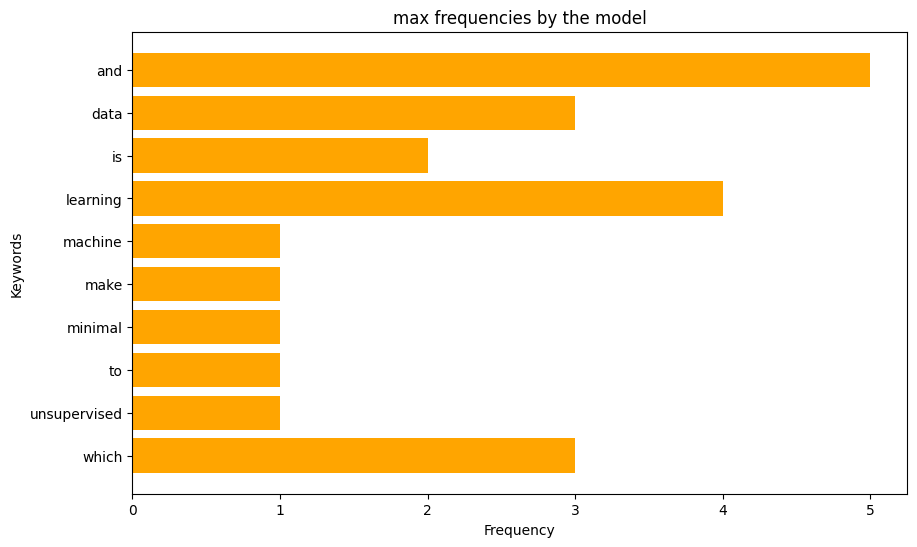

In [18]:
plt.figure(figsize=(10, 6))
plt.barh(keywords, frequencies, color='orange')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.title('max frequencies by the model')
plt.gca().invert_yaxis()  
plt.show()

In [37]:
pos_tags = nltk.pos_tag(words)
pos_tags

[('The', 'DT'),
 ('discipline', 'NN'),
 ('is', 'VBZ'),
 ('broadly', 'RB'),
 ('categorized', 'VBN'),
 ('into', 'IN'),
 ('supervised', 'VBN'),
 ('learning,', 'NN'),
 ('which', 'WDT'),
 ('involves', 'VBZ'),
 ('labeled', 'VBD'),
 ('data;', 'NN'),
 ('unsupervised', 'JJ'),
 ('learning,', 'NN'),
 ('which', 'WDT'),
 ('identifies', 'VBZ'),
 ('hidden', 'JJ'),
 ('structures', 'NNS'),
 ('in', 'IN'),
 ('unlabeled', 'JJ'),
 ('data;', 'NN'),
 ('and', 'CC'),
 ('reinforcement', 'NN'),
 ('learning,', 'NN'),
 ('which', 'WDT'),
 ('optimizes', 'VBZ'),
 ('decisions', 'NNS'),
 ('through', 'IN'),
 ('trial', 'NN'),
 ('and', 'CC'),
 ('error.', 'NN')]

In [87]:
questions = []
for i, (word, tag) in enumerate(pos_tags):
    if tag == 'NN':
        question = sentences[i].replace(word, f"What is {word}?")
        questions.append(question)
        break

    if pos_tags[0][1].startswith('JJ'):
        question = f"How does {sentence}?"
        questions.append(question)

In [88]:
questions

['It plays a pivotal role across diverse fields such as healthcare, finance, and technology, driving innovations and efficiency.']

In [74]:
print(nltk.word_tokenize(sentences[0]))

['Machine', 'learning', 'is', 'a', 'subset', 'of', 'artificial', 'intelligence', ',', 'empowers', 'systems', 'to', 'analyze', 'data', ',', 'identify', 'patterns', ',', 'and', 'make', 'predictions', 'with', 'minimal', 'human', 'intervention', '.']


In [75]:
for item in sentences:
    questions = generate_questions(item)
    print(questions)

['Machine', 'learning', 'is', 'a', 'subset', 'of', 'artificial', 'intelligence', ',', 'empowers', 'systems', 'to', 'analyze', 'data', ',', 'identify', 'patterns', ',', 'and', 'make', 'predictions', 'with', 'minimal', 'human', 'intervention', '.']
What is Machine? learning is a subset of artificial intelligence, empowers systems to analyze data, identify patterns, and make predictions with minimal human intervention.
['What is Machine? learning is a subset of artificial intelligence, empowers systems to analyze data, identify patterns, and make predictions with minimal human intervention.']
['It', 'plays', 'a', 'pivotal', 'role', 'across', 'diverse', 'fields', 'such', 'as', 'healthcare', ',', 'finance', ',', 'and', 'technology', ',', 'driving', 'innovations', 'and', 'efficiency', '.']
It plays a pivotal What is role? across diverse fields such as healthcare, finance, and technology, driving innovations and efficiency.
['It plays a pivotal What is role? across diverse fields such as heal